In [2]:
import pandas as pd
import numpy as np

from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import itertools

In [4]:
players = pd.read_csv("merged_pitching42-12.csv",index_col=0,parse_dates=['debut','finalGame'])
players.head()

,playerID,ERA,WHIP,W-L,G,debut,finalGame,weight,servingDays,debutAge,inducted
0,aasedo01,3.493077,1.390024,0.523810,448,1977-07-26,1990-10-03,190.0,4817.0,23.580822,N
1,abbotgl01,4.331667,1.366252,0.427586,248,1973-07-29,1984-08-08,200.0,4028.0,22.589041,N
2,abbotji01,4.496364,1.433094,0.446154,263,1989-04-08,1999-07-21,200.0,3756.0,22.282192,N
3,abbotky01,8.442500,1.543165,0.190476,57,1991-09-10,1996-08-24,200.0,1810.0,23.706849,N
4,abbotpa01,5.511667,1.491674,0.537500,162,1990-08-21,2004-08-07,185.0,5100.0,23.652055,N


In [5]:
players.shape

(4067, 11)

In [6]:
players.columns

Index(['playerID', 'ERA', 'WHIP', 'W-L', 'G', 'debut', 'finalGame', 'weight',
       'servingDays', 'debutAge', 'inducted'],
      dtype='object')

servingDays are just used for filter samples when check outliers.

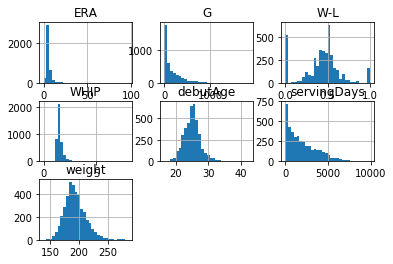

In [7]:
players.hist(bins=30)
plt.show()

In [24]:
players_draw = players

In [25]:
import seaborn as sns
players_N = players_draw[players_draw['inducted']=='N']
players_N_sample = players_N.sample(frac=0.05)
players_Y = players_draw[players_draw['inducted']=='Y']

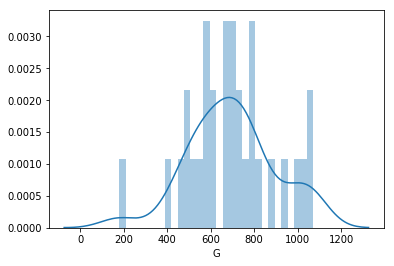

In [26]:
sns.distplot(players_Y.G, bins=30)

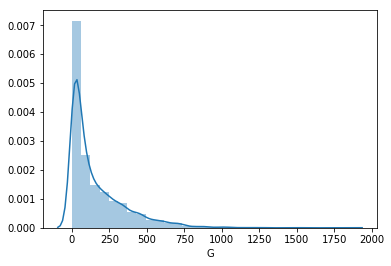

In [27]:
sns.distplot(players_N.G, bins=30)

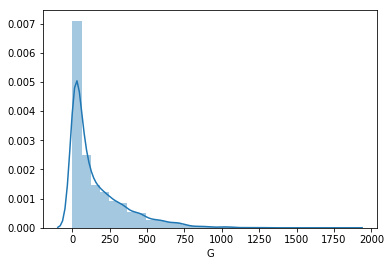

In [28]:
sns.distplot(players.G, bins=30)

In [11]:
def PowerSetsRecursive2(items):
    # the power set of the empty set has one element, the empty set
    result = [[]]
    for x in items:
        result.extend([subset + [x] for subset in result])
    return result

In [32]:
feature_col = ['ERA','W-L','WHIP','G','debutAge']
features = PowerSetsRecursive2(feature_col)[1:]

In [34]:
num_list = []
for feature in features:
    X = players[feature]
    y = players[['inducted']]
    
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 10)
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type='full', random_state = 2018)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
    loglike=best_gmm.score_samples(X)
    players_pre = players[['playerID','servingDays','inducted']]
    players_pre.loc[:,'loglike']=loglike

    player10 = players_pre[players_pre['servingDays']>2000].sort_values(['loglike'],ascending=True).iloc[:50,:]
    num = (player10[player10['inducted']=='Y'].shape[0])
    num_list.append([num,feature])
    print(num)

num_list

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0
3
0
12
0
5
0
8
1
9
1
7
2
4
3
2
1
1
1
3
1
4
2
8
3
7
3
6
4
7
3


[[0, ['ERA']],
 [3, ['W-L']],
 [0, ['ERA', 'W-L']],
 [12, ['WHIP']],
 [0, ['ERA', 'WHIP']],
 [5, ['W-L', 'WHIP']],
 [0, ['ERA', 'W-L', 'WHIP']],
 [8, ['G']],
 [1, ['ERA', 'G']],
 [9, ['W-L', 'G']],
 [1, ['ERA', 'W-L', 'G']],
 [7, ['WHIP', 'G']],
 [2, ['ERA', 'WHIP', 'G']],
 [4, ['W-L', 'WHIP', 'G']],
 [3, ['ERA', 'W-L', 'WHIP', 'G']],
 [2, ['debutAge']],
 [1, ['ERA', 'debutAge']],
 [1, ['W-L', 'debutAge']],
 [1, ['ERA', 'W-L', 'debutAge']],
 [3, ['WHIP', 'debutAge']],
 [1, ['ERA', 'WHIP', 'debutAge']],
 [4, ['W-L', 'WHIP', 'debutAge']],
 [2, ['ERA', 'W-L', 'WHIP', 'debutAge']],
 [8, ['G', 'debutAge']],
 [3, ['ERA', 'G', 'debutAge']],
 [7, ['W-L', 'G', 'debutAge']],
 [3, ['ERA', 'W-L', 'G', 'debutAge']],
 [6, ['WHIP', 'G', 'debutAge']],
 [4, ['ERA', 'WHIP', 'G', 'debutAge']],
 [7, ['W-L', 'WHIP', 'G', 'debutAge']],
 [3, ['ERA', 'W-L', 'WHIP', 'G', 'debutAge']]]

In [35]:
num_list

[[0, ['ERA']],
 [3, ['W-L']],
 [0, ['ERA', 'W-L']],
 [12, ['WHIP']],
 [0, ['ERA', 'WHIP']],
 [5, ['W-L', 'WHIP']],
 [0, ['ERA', 'W-L', 'WHIP']],
 [8, ['G']],
 [1, ['ERA', 'G']],
 [9, ['W-L', 'G']],
 [1, ['ERA', 'W-L', 'G']],
 [7, ['WHIP', 'G']],
 [2, ['ERA', 'WHIP', 'G']],
 [4, ['W-L', 'WHIP', 'G']],
 [3, ['ERA', 'W-L', 'WHIP', 'G']],
 [2, ['debutAge']],
 [1, ['ERA', 'debutAge']],
 [1, ['W-L', 'debutAge']],
 [1, ['ERA', 'W-L', 'debutAge']],
 [3, ['WHIP', 'debutAge']],
 [1, ['ERA', 'WHIP', 'debutAge']],
 [4, ['W-L', 'WHIP', 'debutAge']],
 [2, ['ERA', 'W-L', 'WHIP', 'debutAge']],
 [8, ['G', 'debutAge']],
 [3, ['ERA', 'G', 'debutAge']],
 [7, ['W-L', 'G', 'debutAge']],
 [3, ['ERA', 'W-L', 'G', 'debutAge']],
 [6, ['WHIP', 'G', 'debutAge']],
 [4, ['ERA', 'WHIP', 'G', 'debutAge']],
 [7, ['W-L', 'WHIP', 'G', 'debutAge']],
 [3, ['ERA', 'W-L', 'WHIP', 'G', 'debutAge']]]